In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.signal.windows import gaussian
from scipy.ndimage import convolve1d
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

def print_correlation():
    features = ['Fed Rate', 'CPI_pct', 'CPI', 'Open', 'DXY', 'SPX','Close', 't']
    columns = []
    for x in features:
        row = []
        for y in features:
            correlation = raw[x].corr(raw[y])
            row.append(correlation)
        columns.append(row)
    df = pd.DataFrame(columns, columns=[f'{j}' for j in features], index=[f'{i}' for i in features])
    print(df)
    
pd.set_option('display.expand_frame_repr', False) 
raw = pd.read_excel('raw.xlsx')
raw['CPI_pct'] = raw['CPI'].pct_change() * 100
print_correlation()


          Fed Rate   CPI_pct       CPI      Open       DXY       SPX     Close         t
Fed Rate  1.000000  0.026280 -0.821591 -0.713619  0.314668 -0.616780 -0.714649  0.008295
CPI_pct   0.026280  1.000000 -0.026191 -0.021570 -0.002878 -0.025622 -0.021700 -0.160742
CPI      -0.821591 -0.026191  1.000000  0.813541 -0.320153  0.897183  0.814580 -0.023319
Open     -0.713619 -0.021570  0.813541  1.000000 -0.494090  0.653009  0.999813  0.000715
DXY       0.314668 -0.002878 -0.320153 -0.494090  1.000000 -0.034510 -0.494056 -0.002125
SPX      -0.616780 -0.025622  0.897183  0.653009 -0.034510  1.000000  0.653798  0.007556
Close    -0.714649 -0.021700  0.814580  0.999813 -0.494056  0.653798  1.000000  0.000468
t         0.008295 -0.160742 -0.023319  0.000715 -0.002125  0.007556  0.000468  1.000000


          Fed Rate   CPI_pct       CPI      Open       DXY       SPX     Close         t
Fed Rate  1.000000  0.026280 -0.821591 -0.713619  0.314668 -0.616780 -0.714649  0.008295
CPI_pct   0.026280  1.000000 -0.026191 -0.021570 -0.002878 -0.025622 -0.021700 -0.160742
CPI      -0.821591 -0.026191  1.000000  0.813541 -0.320153  0.897183  0.814580 -0.023319
Open     -0.713619 -0.021570  0.813541  1.000000 -0.494090  0.653009  0.999813  0.000715
DXY       0.314668 -0.002878 -0.320153 -0.494090  1.000000 -0.034510 -0.494056 -0.002125
SPX      -0.616780 -0.025622  0.897183  0.653009 -0.034510  1.000000  0.653798  0.007556
Close    -0.714649 -0.021700  0.814580  0.999813 -0.494056  0.653798  1.000000  0.000468
t         0.008295 -0.160742 -0.023319  0.000715 -0.002125  0.007556  0.000468  1.000000


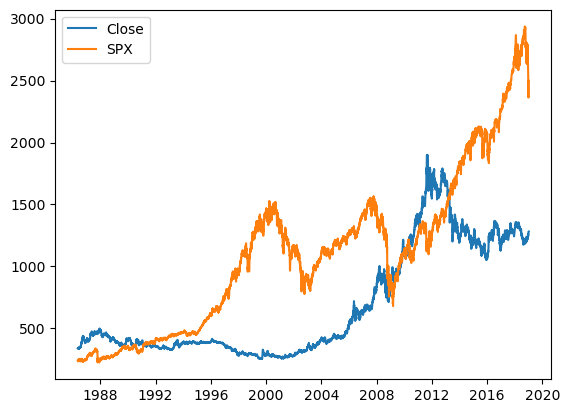

In [5]:
# Perform inflation adjustment
# raw['SPDR'] = raw['SPDR']/raw['CPI']
# raw['SPX'] = raw['SPX']/raw['CPI']

plt.plot(raw['Date'], raw['Close'], label='Close')
plt.plot(raw['Date'], raw['SPX'], label='SPX')
plt.legend()
print_correlation()

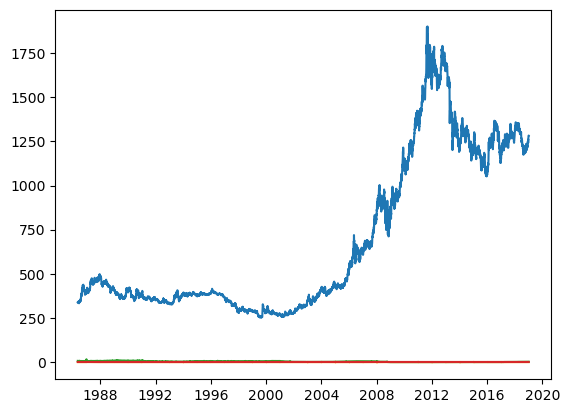

In [6]:
# Plot time

plt.plot(raw['Date'], raw['Close'], label='Close')
plt.plot(raw['Date'], raw['CPI_pct'], label='CPI')
plt.plot(raw['Date'], raw['Fed Rate'], label='Fed Rate')
plt.plot(raw['Date'], raw['DXY']/100, label='DXY')


In [7]:
raw.to_excel('decorrelated.xlsx') 

In [8]:
print(raw)

      Unnamed: 0       Date  Fed Rate    Close      CPI     Open         DXY          SPX    t  CPI_pct
0           1625 1986-05-15      7.00   339.57  110.500   340.81  111.500000   237.539993  139      NaN
1           1626 1986-05-16      6.80   340.81  110.500   341.13  112.559998   234.429993  140  0.00000
2           1627 1986-05-19      6.89   338.21  110.500   340.40  113.279999   232.759995  143  0.00000
3           1628 1986-05-20      6.86   336.03  110.500   337.90  112.919998   233.199997  144  0.00000
4           1629 1986-05-21      6.96   335.93  110.500   336.65  113.529999   236.110001  145  0.00000
...          ...        ...       ...      ...      ...      ...         ...          ...  ...      ...
8480       10105 2018-12-26      2.40  1266.98  251.233  1270.33   96.580002  2363.120117  367  0.00000
8481       10106 2018-12-27      2.40  1275.22  251.233  1266.89   96.919998  2442.500000  368  0.00000
8482       10107 2018-12-28      2.40  1280.75  251.233  1275.22